In [293]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from bs4 import BeautifulSoup
import json

In [294]:
with open( '../Data/VAF_Data/p377_variant_summary.html', 'r') as mf:
    file = mf.read()

In [295]:
soup = BeautifulSoup(file, 'html.parser')

In [296]:
mysoup = soup.body.div.find_all("script")

In [297]:
mysoup = soup.body.div.find_all("script")[1].contents[0].strip()
mysoup

'{"columns":[{"label":["TARGET_NAME"],"name":[1],"type":["fctr"],"align":["left"]},{"label":["PATIENT"],"name":[2],"type":["fctr"],"align":["left"]},{"label":["CHR"],"name":[3],"type":["fctr"],"align":["left"]},{"label":["START"],"name":[4],"type":["int"],"align":["right"]},{"label":["END"],"name":[5],"type":["int"],"align":["right"]},{"label":["REF"],"name":[6],"type":["fctr"],"align":["left"]},{"label":["ALT"],"name":[7],"type":["fctr"],"align":["left"]},{"label":["GENE"],"name":[8],"type":["fctr"],"align":["left"]},{"label":["PROTEIN_CHANGE"],"name":[9],"type":["fctr"],"align":["left"]},{"label":["cDNA_CHANGE"],"name":[10],"type":["fctr"],"align":["left"]},{"label":["TARGET_VAF_MEAN"],"name":[11],"type":["dbl"],"align":["right"]},{"label":["Autotate_annot1"],"name":[12],"type":["fctr"],"align":["left"]},{"label":["Autotate_annot2"],"name":[13],"type":["fctr"],"align":["left"]},{"label":["VARIANT"],"name":[14],"type":["chr"],"align":["left"]},{"label":["sampleID_short"],"name":[15],"

In [298]:
table_dict = json.loads(mysoup)

for key in table_dict:
    print(key)

columns
data
options


In [299]:
columns = [stuff["label"][0] for stuff in table_dict["columns"]]

In [300]:
table_dict["data"]

data = []
for stuff in table_dict["data"]:
    rows = []
    for key in stuff:
        rows.append(stuff[key])
    data.append(rows)
    
variant_annotations = pd.DataFrame(data, columns = columns)
variant_annotations

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short
0,IID_H198302_T01_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.410,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T01_01_TD01
1,IID_H198302_T02_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.395,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T02_01_TD01
2,IID_H198302_T03_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.437,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T03_01_TD01
3,IID_H198302_T04_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.477,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T04_01_TD01
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,IID_H198303_T02_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.455,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T02_01_TD01
71,IID_H198303_T03_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.482,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T03_01_TD01
72,IID_H198304_T01_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.332,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T01_01_TD01
73,IID_H198304_T02_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.374,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T02_01_TD01


In [301]:
#save supplied data
variant_annotations.to_csv('../Data/VAF_Data/MSK_VAFS.tsv', sep = '\t')

In [302]:
#Add in patient initials
variant_annotations['pat'] = variant_annotations['PATIENT']

init_dict = {
    'IID_H198302': 'PD7153',
    'IID_H198303': 'PD7151',
    'IID_H198304': 'JP001'
}

variant_annotations['patient_init'] = variant_annotations['pat'].replace(init_dict)

In [303]:
#Add in cell type
variant_annotations['cel'] = variant_annotations['TARGET_NAME']
ct_dict = {
    'T01': 'BM_MNC',
    'T02': 'Mono',
    'T03': 'nBC',
    'T04': 'Neut'
}

patients = variant_annotations['TARGET_NAME'].to_list()
cells = []
for pat in patients: 
    for a in ct_dict:
        x = (pat.split('_')[2])
        if a == x:
            cells.append(ct_dict[a])
            
cell_dict = dict(zip(patients, cells))   

variant_annotations['celltype'] = variant_annotations['cel'].replace(cell_dict)

variant_annotations = variant_annotations.drop(columns = ['cel', 'pat'])
variant_annotations

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype
0,IID_H198302_T01_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.410,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T01_01_TD01,PD7153,BM_MNC
1,IID_H198302_T02_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.395,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T02_01_TD01,PD7153,Mono
2,IID_H198302_T03_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.437,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T03_01_TD01,PD7153,nBC
3,IID_H198302_T04_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.477,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T04_01_TD01,PD7153,Neut
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,PD7153,BM_MNC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,IID_H198303_T02_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.455,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T02_01_TD01,PD7151,Mono
71,IID_H198303_T03_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.482,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T03_01_TD01,PD7151,nBC
72,IID_H198304_T01_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.332,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T01_01_TD01,JP001,BM_MNC
73,IID_H198304_T02_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.374,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T02_01_TD01,JP001,Mono


In [304]:
#save annotated data
variant_annotations.to_csv('../Data/VAF_Data/MSK_VAFS_PT_CELL.tsv', sep = '\t')

In [305]:
#Add in PCR amplicon name
variant_annotations['Mean_VAF'] = pd.to_numeric(variant_annotations['TARGET_VAF_MEAN'], downcast = 'float')
variant_annotations

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype,Mean_VAF
0,IID_H198302_T01_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.410,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T01_01_TD01,PD7153,BM_MNC,0.410
1,IID_H198302_T02_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.395,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T02_01_TD01,PD7153,Mono,0.395
2,IID_H198302_T03_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.437,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T03_01_TD01,PD7153,nBC,0.437
3,IID_H198302_T04_01_TD01,IID_H198302,1,33134916,33134916,T,A,RBBP4,p.N282K,c.846T>A,0.477,AUTO_OK,UNKNOWN,RBBP4_p.N282K,T04_01_TD01,PD7153,Neut,0.477
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,PD7153,BM_MNC,0.474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,IID_H198303_T02_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.455,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T02_01_TD01,PD7151,Mono,0.455
71,IID_H198303_T03_01_TD01,IID_H198303,4,106164802,106164803,GC,G,TET2,p.A1224fs*2,c.3671delC,0.482,AUTO_OK,ONCOGENIC,TET2_p.A1224fs*2,T03_01_TD01,PD7151,nBC,0.482
72,IID_H198304_T01_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.332,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T01_01_TD01,JP001,BM_MNC,0.332
73,IID_H198304_T02_01_TD01,IID_H198304,4,106164782,106164783,CT,C,TET2,p.G1218fs*8,c.3651delT,0.374,AUTO_OK,ONCOGENIC,TET2_p.G1218fs*8,T02_01_TD01,JP001,Mono,0.374


In [306]:
#prot = variant_annotations['PROTEIN_CHANGE'].drop_duplicates().to_list()
#prot

In [307]:
meta = pd.read_excel('../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx')
mut = meta['MUT_NAME'].to_list()
prot = meta['PROTEIN_CHANGE'].to_list()
amp_assign = dict(zip(prot, mut))
old = 'p.Q1276* aka p.Q1265*'
new = 'p.Q1276*'
amp_assign[new] = amp_assign.pop(old)
print(len(amp_assign), amp_assign)

variant_annotations['Amplicon'] = variant_annotations['PROTEIN_CHANGE'].replace(amp_assign)

11 {'p.P95H': 'PD7153_SRSF2', 'p.L1065fs*1': 'PD7153_TET2a', 'p.Q685*': 'PD7153_TET2b', 'p.T360M': 'PD7153_TGFB3_g', 'p.K1090fs*15': 'PD7151_TET2a', 'p.A1224fs*2': 'PD7151_TET2b', 'p.A187T': 'JP001_RUNX1_g', 'p.P95R': 'JP001_SRSF2', 'p.G1218fs*8': 'JP001_TET2a', 'p.Y1337*': 'JP001_TET2b_g', 'p.Q1276*': 'PD7153_CUX1'}


In [308]:
variant_annotations.loc[variant_annotations['patient_init'].isin(['PD7151'])]

,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype,Mean_VAF,Amplicon
20,IID_H198303_T01_01_TD01,IID_H198303,7,66461972,66461972,A,G,TYW1,p.?,c.4+3A>G,0.472,AUTO_OK,UNKNOWN,TYW1_p.?,T01_01_TD01,PD7151,BM_MNC,0.472,p.?
21,IID_H198303_T02_01_TD01,IID_H198303,7,66461972,66461972,A,G,TYW1,p.?,c.4+3A>G,0.488,AUTO_OK,UNKNOWN,TYW1_p.?,T02_01_TD01,PD7151,Mono,0.488,p.?
22,IID_H198303_T03_01_TD01,IID_H198303,7,66461972,66461972,A,G,TYW1,p.?,c.4+3A>G,0.495,AUTO_OK,UNKNOWN,TYW1_p.?,T03_01_TD01,PD7151,nBC,0.495,p.?
23,IID_H198303_T01_01_TD01,IID_H198303,7,140482949,140482949,T,C,BRAF,p.T396A,c.1186A>G,0.450,AUTO_OK,UNKNOWN,BRAF_p.T396A,T01_01_TD01,PD7151,BM_MNC,0.450,p.T396A
24,IID_H198303_T02_01_TD01,IID_H198303,7,140482949,140482949,T,C,BRAF,p.T396A,c.1186A>G,0.465,AUTO_OK,UNKNOWN,BRAF_p.T396A,T02_01_TD01,PD7151,Mono,0.465,p.T396A
25,IID_H198303_T03_01_TD01,IID_H198303,7,140482949,140482949,T,C,BRAF,p.T396A,c.1186A>G,0.494,AUTO_OK,UNKNOWN,BRAF_p.T396A,T03_01_TD01,PD7151,nBC,0.494,p.T396A
26,IID_H198303_T01_01_TD01,IID_H198303,9,5073770,5073770,G,T,JAK2,p.V617F,c.1849G>T,0.041,AUTO_OK,ONCOGENIC,JAK2_p.V617F,T01_01_TD01,PD7151,BM_MNC,0.041,p.V617F
27,IID_H198303_T02_01_TD01,IID_H198303,9,5073770,5073770,G,T,JAK2,p.V617F,c.1849G>T,0.018,AUTO_OK,ONCOGENIC,JAK2_p.V617F,T02_01_TD01,PD7151,Mono,0.018,p.V617F
28,IID_H198303_T03_01_TD01,IID_H198303,9,5073770,5073770,G,T,JAK2,p.V617F,c.1849G>T,0.039,AUTO_OK,ONCOGENIC,JAK2_p.V617F,T03_01_TD01,PD7151,nBC,0.039,p.V617F
29,IID_H198303_T01_01_TD01,IID_H198303,16,67654615,67654615,C,G,CTCF,p.R368G,c.1102C>G,0.099,AUTO_OK,LIKELY,CTCF_p.R368G,T01_01_TD01,PD7151,BM_MNC,0.099,p.R368G


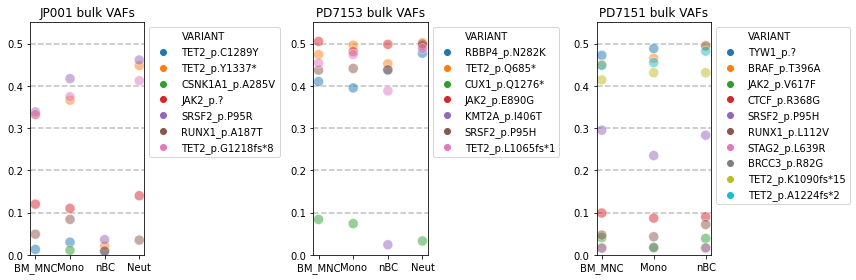

In [309]:
# Plot all VAFS
fig, ax = plt.subplots(1, 3, figsize = (12,4))
patients = ['JP001', 'PD7153', 'PD7151']


for count, patient in enumerate(patients):
    sns.scatterplot(x = 'celltype', y = ('Mean_VAF'), data = variant_annotations.loc[variant_annotations['patient_init'].isin([patient])], s = 100, hue = 'VARIANT', alpha = 0.5, ax = ax[count])
    ax[count].legend(loc = 'upper left', bbox_to_anchor = [1,1])
    ax[count].set_title(f'{patient} bulk VAFs') 
    ax[count].set_ylim(0,0.55)
    ax[count].axhline(0.1, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
        
fig.tight_layout()  

In [310]:
# Make a smaller df that just has the PCR amplicons in it
variant_annotations_amps = variant_annotations.loc[variant_annotations['Amplicon'].isin(mut)]

#Test for where amplicon assignment doesn't fit patient (ie/ PD7151 SRSF2 which gets incorrectly labelled as a different patient because it wasn't PCR amplified)
pt_test = []
for index, row in variant_annotations_amps.iterrows():
    pt_test.append(row['Amplicon'].split('_')[0])

variant_annotations_amps['pt_test'] = pt_test

variant_annotations_amps = variant_annotations_amps.loc[variant_annotations_amps['pt_test'] == variant_annotations_amps['patient_init']]
variant_annotations_amps    
#save annotated data for amplicons
#variant_annotations_amps.to_csv('../Data/VAF_Data/MSK_VAFS_PT_CELL_AMPLICON.tsv', sep = '\t')

<ipython-input-310-cbdcb6e81c18>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variant_annotations_amps['pt_test'] = pt_test


,TARGET_NAME,PATIENT,CHR,START,END,REF,ALT,GENE,PROTEIN_CHANGE,cDNA_CHANGE,TARGET_VAF_MEAN,Autotate_annot1,Autotate_annot2,VARIANT,sampleID_short,patient_init,celltype,Mean_VAF,Amplicon,pt_test
4,IID_H198302_T01_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.474,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T01_01_TD01,PD7153,BM_MNC,0.474,PD7153_TET2b,PD7153
5,IID_H198302_T02_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.496,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T02_01_TD01,PD7153,Mono,0.496,PD7153_TET2b,PD7153
6,IID_H198302_T03_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.452,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T03_01_TD01,PD7153,nBC,0.452,PD7153_TET2b,PD7153
7,IID_H198302_T04_01_TD01,IID_H198302,4,106157152,106157152,C,T,TET2,p.Q685*,c.2053C>T,0.502,AUTO_OK,ONCOGENIC,TET2_p.Q685*,T04_01_TD01,PD7153,Neut,0.502,PD7153_TET2b,PD7153
8,IID_H198302_T01_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.084,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T01_01_TD01,PD7153,BM_MNC,0.084,PD7153_CUX1,PD7153
9,IID_H198302_T02_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.074,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T02_01_TD01,PD7153,Mono,0.074,PD7153_CUX1,PD7153
10,IID_H198302_T04_01_TD01,IID_H198302,7,101882770,101882770,C,T,CUX1,p.Q1276*,c.3826C>T,0.033,AUTO_OK,ONCOGENIC,CUX1_p.Q1276*,T04_01_TD01,PD7153,Neut,0.033,PD7153_CUX1,PD7153
16,IID_H198302_T01_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.437,RESCUE,ONCOGENIC,SRSF2_p.P95H,T01_01_TD01,PD7153,BM_MNC,0.437,PD7153_SRSF2,PD7153
17,IID_H198302_T02_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.441,RESCUE,ONCOGENIC,SRSF2_p.P95H,T02_01_TD01,PD7153,Mono,0.441,PD7153_SRSF2,PD7153
18,IID_H198302_T03_01_TD01,IID_H198302,17,74732959,74732959,G,T,SRSF2,p.P95H,c.284C>A,0.438,AUTO_OK,ONCOGENIC,SRSF2_p.P95H,T03_01_TD01,PD7153,nBC,0.438,PD7153_SRSF2,PD7153


In [311]:
#mut

In [312]:
#Create empty values for PD7151 missing amplicon
cs = list(variant_annotations_amps.columns)
blank1 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.1',
 'PD7151_TET2a',
 'PD7151']
blank2 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.21',
 'PD7151_TET2b',
 'PD7151']
blank = pd.DataFrame(np.array([blank1, blank2]),columns=cs)

In [313]:
var_ann_blank = pd.concat([variant_annotations_amps, blank])
var_ann_blank = var_ann_blank[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]

In [314]:
variant_annotations_amps.sort_values(by=['Amplicon'], inplace = True)
variant_annotations_amps.sort_values(by=['celltype'], inplace = True)

var_ann_blank.sort_values(by=['Amplicon'], inplace = True)
var_ann_blank.sort_values(by=['celltype'], inplace = True)

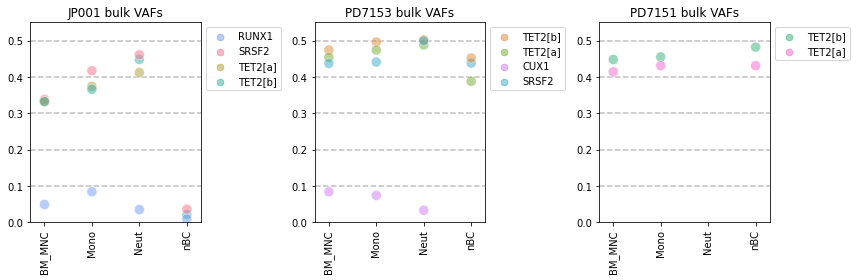

In [315]:
#Scatterplot
fig, ax = plt.subplots(1, 3, figsize = (12,4))
patients = ['JP001', 'PD7153', 'PD7151']

all_amps = ['JP001_SRSF2',
            'PD7153_TET2b',
            'JP001_TET2a',
            'PD7153_TET2a', 
            'PD7151_TET2b',
            'JP001_TET2b_g', 
            'PD7153_SRSF2', 
            'JP001_RUNX1_g',
            'PD7153_CUX1',
            'PD7151_TET2a'
           ]
short_label = ['SRSF2',
        'TET2[b]',
        'TET2[a]',
        'TET2[a]', 
        'TET2[b]',
        'TET2[b]', 
        'SRSF2', 
        'RUNX1',
        'CUX1',
        'TET2[a]'
       ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

for count, patient in enumerate(patients):
    plot_data = var_ann_blank.loc[var_ann_blank['patient_init'].isin([patient])]

    
    sns.scatterplot(x = 'celltype', y = 'Mean_VAF', data = plot_data,  s = 100, hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels()
    lbl = []
    for lb in labels[1:]:
        lbl.append(relabel[lb])    
    
    lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [1,1], markerscale = 1.1, handles=handles[1:], labels=lbl)
    ax[count].set_title(f'{patient} bulk VAFs') 
    ax[count].set_ylim(0,0.55)
    ax[count].axhline(0.1, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax[count].margins(x=0.1)
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        
fig.tight_layout()    
fig.savefig('../Results/Bulk_VAFs_scatter.png',bbox_inches='tight', dpi = 300)

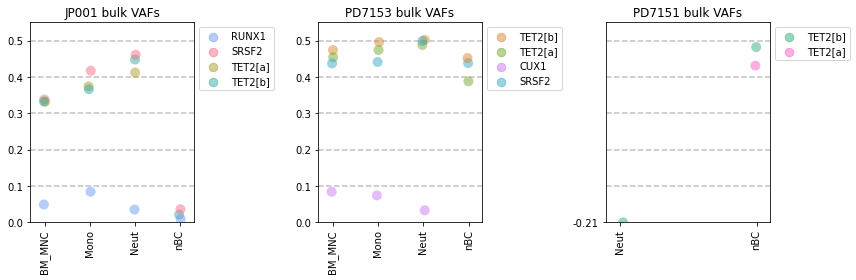

In [316]:
#Stripplot
fig, ax = plt.subplots(1, 3, figsize = (12,4))
patients = ['JP001', 'PD7153', 'PD7151']

all_amps = ['JP001_SRSF2',
            'PD7153_TET2b',
            'JP001_TET2a',
            'PD7153_TET2a', 
            'PD7151_TET2b',
            'JP001_TET2b_g', 
            'PD7153_SRSF2', 
            'JP001_RUNX1_g',
            'PD7153_CUX1',
            'PD7151_TET2a'
           ]
short_label = ['SRSF2',
        'TET2[b]',
        'TET2[a]',
        'TET2[a]', 
        'TET2[b]',
        'TET2[b]', 
        'SRSF2', 
        'RUNX1',
        'CUX1',
        'TET2[a]'
       ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

for count, patient in enumerate(patients):
    plot_data = var_ann_blank.loc[var_ann_blank['patient_init'].isin([patient])]
    
                
    sns.stripplot(x = 'celltype', y = 'Mean_VAF', data = plot_data, jitter = 0.03, s = 10, hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels()
    lbl = []
    for lb in labels:
        lbl.append(relabel[lb])    
    
    lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [1,1], markerscale = 1.1, handles=handles, labels=lbl)
    ax[count].set_title(f'{patient} bulk VAFs') 
    ax[count].set_ylim(0,0.55)
    ax[count].axhline(0.1, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax[count].margins(x=0.1)
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        
fig.tight_layout()    
fig.savefig('../Results/Bulk_VAFs_stripplot.png',bbox_inches='tight', dpi = 300)

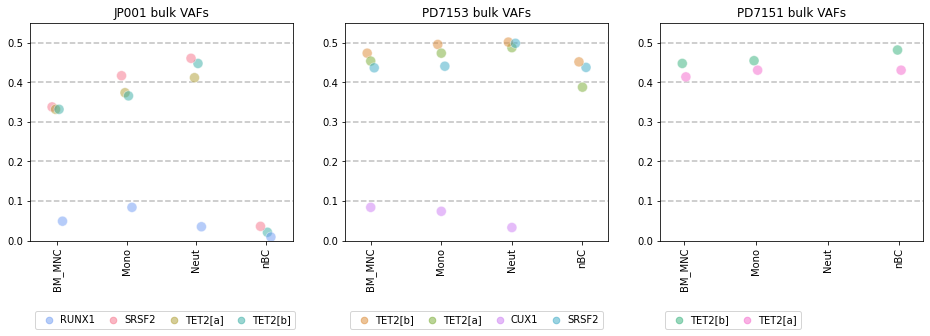

In [317]:
#Scatter again with some help from Fabio
fig, ax = plt.subplots(1, 3, figsize = (16,4))
patients = ['JP001', 'PD7153', 'PD7151']

all_amps = ['JP001_SRSF2',
            'PD7153_TET2b',
            'JP001_TET2a',
            'PD7153_TET2a', 
            'PD7151_TET2b',
            'JP001_TET2b_g', 
            'PD7153_SRSF2', 
            'JP001_RUNX1_g',
            'PD7153_CUX1',
            'PD7151_TET2a'
           ]
short_label = ['SRSF2',
        'TET2[b]',
        'TET2[a]',
        'TET2[a]', 
        'TET2[b]',
        'TET2[b]', 
        'SRSF2', 
        'RUNX1',
        'CUX1',
        'TET2[a]'
       ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

cell_order = ['BM_MNC', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

var_ann_blank['x_value'] = var_ann_blank['celltype'].map(cell_order_map)

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.075
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.025
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.025
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.075

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.05
#var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.0
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.05

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.025
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.025

for count, patient in enumerate(patients):
    plot_data = var_ann_blank.loc[var_ann_blank['patient_init'].isin([patient])]
    
                
    sns.scatterplot(x = 'x_value', y = 'Mean_VAF', data = plot_data,  s = 100, hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels()
    lbl = []
    for lb in labels[1:]:
        lbl.append(relabel[lb])    
    
    lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [0,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 4, markerscale = 1.1, handles=handles[1:], labels=lbl)
    ax[count].set_title(f'{patient} bulk VAFs') 
    ax[count].set_ylim(0,0.55)
    ax[count].axhline(0.1, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax[count].margins(x=0.1)
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        
#fig.tight_layout()    
fig.savefig('../Results/Bulk_VAFs.png',bbox_inches='tight', dpi = 300)